<a href="https://colab.research.google.com/github/Willrodagu/Proj_analise_de_dados/blob/main/Analise_de_dados_de_exporta%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de analise de dados com Python e Pandas**

O projeto tem por objetivo apresentar uma analise das exportações brasileiras com base em dados de 2018 até o momento.

Fonte dos dados: http://comexstat.mdic.gov.br/pt/municipio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#IMPORTANDO A BASE DE DADOS
df = pd.read_csv("/content/drive/MyDrive/Datasets/Exportação.csv", sep=";")
#VISUALIZANDO A BASE DE DADOS
df.head()

,Ano,Mês,País,Bloco Econômico,Valor FOB (US$),Quilograma Líquido
0,2021,9,Afeganistão,Ásia (Exclusive Oriente Médio),561532,210089
1,2021,9,África do Sul,África,109393141,88626256
2,2021,9,Albânia,Europa,5287597,2893673
3,2021,9,Alemanha,Europa,378245314,476217494
4,2021,9,Alemanha,União Europeia - UE,378245314,476217494


In [ ]:
#VERIFICANDO QUANTAS LINHAS E COLUNAS TEM A BASE DE DADOS
df.shape

(11602, 6)

In [ ]:
#VERIFICANDO SE OS VALORES ESTÃO RECOLNHECIDO DA MANEIRA CORRETA
df.dtypes

Ano                    int64
Mês                    int64
País                  object
Bloco Econômico       object
Valor FOB (US$)        int64
Quilograma Líquido     int64
dtype: object

In [ ]:
#VERIFICANDO A EXISTENCIA DE VALORES "NULL" NAS COLUNAS
df.isnull().sum()

Ano                   0
Mês                   0
País                  0
Bloco Econômico       0
Valor FOB (US$)       0
Quilograma Líquido    0
dtype: int64

**Qual é o volume exportação por ano?**








In [19]:
pd.options.display.float_format = 'US$ {:20,.2f}'.format

In [ ]:
#CALCULANDO A RECEITA TOTAL
RT = round(df["Valor FOB (US$)"].sum())
print("US$ {}".format(RT))

US$ 1131370420447


Text(0, 0.5, 'Ano')

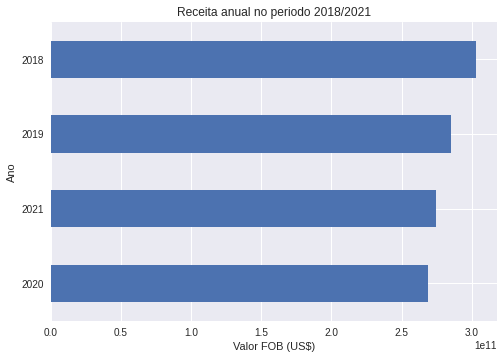

In [ ]:
#VER A RECEITA POR ANO
df.groupby("Ano")["Valor FOB (US$)"].sum().sort_values(ascending=True).plot.barh(title="Receita anual no periodo 2018/2021")
plt.xlabel("Valor FOB (US$)")
plt.ylabel("Ano")

**Quais os blocos econômico com maior relevancia na exportação do produto Brasileiro?**

Text(0, 0.5, 'Bloco Econômico')

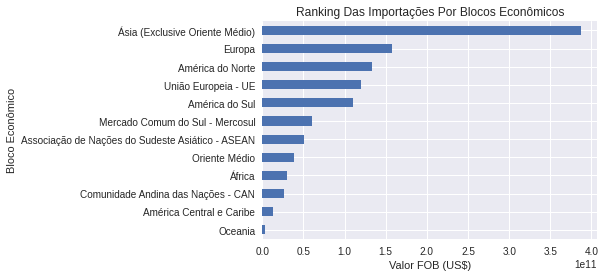

In [4]:
#VER A RECEITA POR BLOCO ECONÔMICO
#Ranking dos 5 clientes blocos mais influentes

Ranking_be = df.groupby("Bloco Econômico")["Valor FOB (US$)"].sum().sort_values(ascending=True).plot.barh(title="Ranking Das Importações Por Blocos Econômicos")
plt.xlabel("Valor FOB (US$)")
plt.ylabel("Bloco Econômico")


In [34]:
import plotly.express as px

In [41]:
#Qual é a média das exportações por Bloco Econômico?
mebe = df.groupby("Bloco Econômico")["Valor FOB (US$)"].mean().sort_values(ascending=False)
#Resetando o index
mebe_reset = mebe.reset_index()
mebe_reset.head(3)

,Bloco Econômico,Valor FOB (US$)
0,América do Norte,"US$ 991,754,280.34"
1,Mercado Comum do Sul - Mercosul,"US$ 446,794,957.69"
2,Ásia (Exclusive Oriente Médio),"US$ 265,787,437.91"


**Para quais paises o Brasil mais exportou no periodo?**

Text(0, 0.5, 'País')

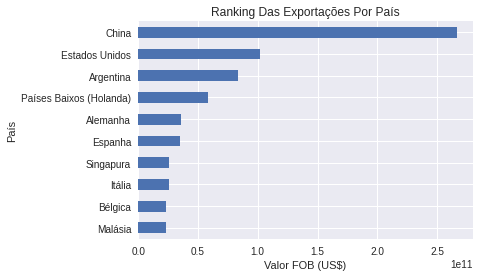

In [13]:
#VER A RECEITA POR PAÍS
#Rankear os 10 maiores clientes no periodo

Ranking = df.groupby("País")["Valor FOB (US$)"].sum().sort_values(ascending=False)
Ranking.head(10).sort_values(ascending=True).plot.barh(title="Ranking Das Exportações Por País")
plt.xlabel("Valor FOB (US$)")
plt.ylabel("País")



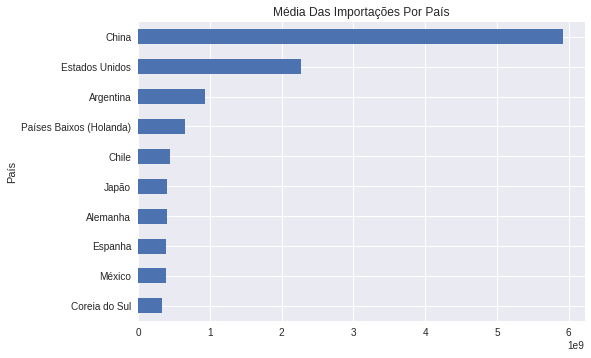

In [ ]:
#Qual é a média das exportações por país?
mep = df.groupby("País")["Valor FOB (US$)"].mean().sort_values(ascending=False).reset_index()
mep_reset = mep.head(10)
mep_graf = mep_reset.groupby("País")["Valor FOB (US$)"].mean().sort_values(ascending=True).plot.barh(title="Média Das Importações Por País")


**Cliente em potencial: relação bloco economico x pais (principais exportadores)**